In [4]:
import numpy as np
import pandas as pd
import numpy as np

import matplotlib as plt
from matplotlib.image import imread

import seaborn as sns
import os
from gc import callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [5]:
for dirname, _, filenames in os.walk('./dataset/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/chest_xray/test/PNEUMONIA/VIRUS-2040583-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-9671740-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-4059589-0003.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-5141192-0002.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-3225323-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-8190872-0004.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-4322734-0002.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-4376803-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-6076183-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-821920-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-2102459-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-8435135-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-4033321-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-6523466-0002.jpeg
./dataset/chest_xray/test/PNEUMONIA/BACTERIA-840611-0001.jpeg
./dataset/chest_xray/test/PNEUMONIA/VIRUS-2352342-0002.jpeg
./dataset/chest_xr

./dataset/chest_xray/train/PNEUMONIA/BACTERIA-3309082-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/VIRUS-8303986-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-3118797-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-4747179-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-4615614-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-7986969-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-1332623-0003.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-4002975-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-9365328-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-9597998-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-5619191-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-4338635-0003.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-338181-0003.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-8034950-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-6235826-0003.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERI

./dataset/chest_xray/train/PNEUMONIA/BACTERIA-3141540-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-8466959-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-5762799-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-1427905-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-7234183-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-3322717-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-7794093-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-1820776-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/VIRUS-4003398-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/VIRUS-355597-0004.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-2475261-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-6518498-0004.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-266879-0002.jpeg
./dataset/chest_xray/train/PNEUMONIA/VIRUS-9289090-0001.jpeg
./dataset/chest_xray/train/PNEUMONIA/VIRUS-417263-0007.jpeg
./dataset/chest_xray/train/PNEUMONIA/BACTERIA-52163-000

./dataset/chest_xray/train/NORMAL/NORMAL-6299880-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-8652901-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-5881224-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-3860648-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-9739016-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-1798503-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-824917-0003.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-202916-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-7436212-0003.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-7033377-0002.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-1482788-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-2140240-0002.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-5571242-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-3487615-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-6116579-0001.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-2504415-0002.jpeg
./dataset/chest_xray/train/NORMAL/NORMAL-1739213-0001.jpeg

In [6]:
train_path = './dataset/chest_xray/train/'
test_path = './dataset/chest_xray/test/'

os.listdir(train_path)
os.listdir(test_path)
os.listdir(train_path + 'NORMAL')[0]

'NORMAL-2552119-0002.jpeg'

In [13]:
malaria_cell = train_path + 'PNEUMONIA' + '/BACTERIA-923246-0002.jpeg'
malaria_cellg = train_path + 'PNEUMONIA' 

In [14]:
imread(malaria_cell).shape

(896, 1288)

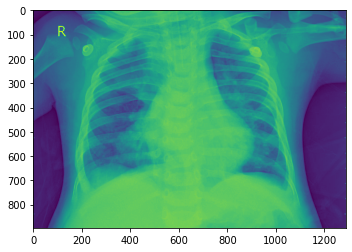

In [16]:
plt.pyplot.imshow(imread(malaria_cell))

In [20]:
NORMAL_cell = train_path + 'NORMAL' + '/NORMAL-7279550-0001.jpeg'

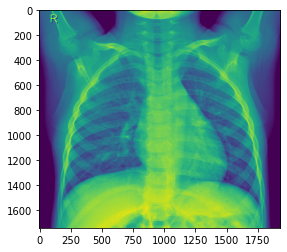

In [21]:
plt.pyplot.imshow(imread(NORMAL_cell))

In [22]:
len(os.listdir(train_path+'NORMAL'))
len(os.listdir(train_path+'PNEUMONIA'))

3883

In [23]:
image_shape = (800,800,1)

In [24]:
imread(NORMAL_cell).max()

255

In [25]:
image_gen = ImageDataGenerator(rotation_range=20, # Faire pivoter l'image de 20 degrés
                               width_shift_range=0.10, # Modifier la largeur de la photo de 10% maximum
                               height_shift_range=0.10, # Modifier la hauteur de la photo de 10% maximum
                              rescale=1/255, # Redimensionner l'image en la normalisant
                               shear_range=0.1, # shear signifie couper une partie de l'image (max 10%)
                               zoom_range=0.1, # Zoom de 10% maximum
                               horizontal_flip=True, # Autorise le basculement horizontal
                               fill_mode='nearest' # Remplir les pixels manquants avec la valeur remplie la plus proche
                              )

In [26]:
para_img = imread(NORMAL_cell)

para_img.shape

(1743, 1932)

In [27]:
image_gen.flow_from_directory(train_path)

Found 5232 images belonging to 2 classes.


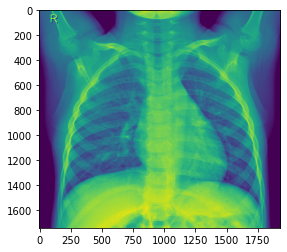

In [29]:
plt.pyplot.imshow(para_img)

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Les couches Dropout aident à réduire l'overfitting en désactivant les neurones de façon aléatoire pendant l'entraînement.
# Ici nous demandons de désactiver aléatoirement 50% des neurones.
model.add(Dropout(0.5))

# Dernière couche, n'oubliez pas c'est binaire, nous utilisons donc la sigmoïde
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 797, 797, 32)      544       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 398, 398, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 395, 395, 64)      32832     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 197, 197, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 194, 194, 64)      65600     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 97, 97, 64)      

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [36]:
batch_size= 4

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='binary')

Found 5232 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                                batch_size= batch_size,
                                                class_mode='binary',
                                               shuffle=False)

Found 624 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# train of the model
results = model.fit(train_image_gen, epochs=20, validation_data= test_image_gen, callbacks=[early_stop] )

Epoch 1/20
  17/1308 [..............................] - ETA: 49:50 - loss: 0.8851 - accuracy: 0.7500